<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML03_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear regression

###The normal equation
$\hat\theta =  (X^{T}X)^{-1}X^{T}y$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

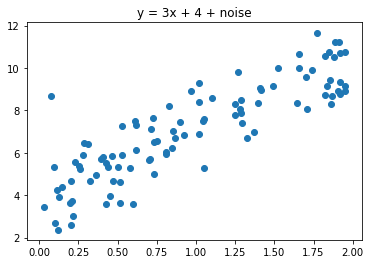

In [ ]:
plt.scatter(X, y)
plt.title('y = 3x + 4 + noise')
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.99651407],
       [3.18029181]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99651407],
       [10.3570977 ]])

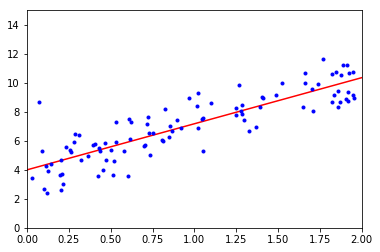

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99651407]), array([[3.18029181]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.99651407],
       [10.3570977 ]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99651407],
       [3.18029181]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.99651407],
       [3.18029181]])

###Gradient descent

$\nabla_{\theta} MSE(\theta) = \frac{2}{m}X^{T}(X\theta-y)$

$\theta_{i+1} = \theta_i - \eta\nabla_{\theta}MSE(\theta)$

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.99651407],
       [3.18029181]])

###SGD

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[3.99457606],
       [3.13717515]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98046168]), array([3.14202338]))

###Polynomial regression

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) 

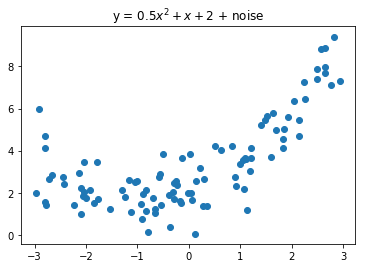

In [ ]:
plt.scatter(X, y)
plt.title('y = $0.5x^{2} + x + 2$ + noise')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.11807997])

In [ ]:
X_poly[0]

array([1.11807997, 1.25010281])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.12353229]), array([[0.90223631, 0.45641897]]))

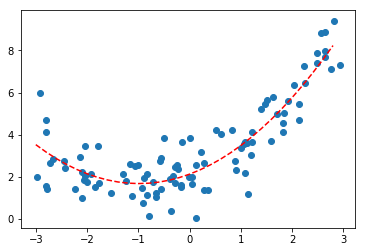

In [ ]:
plt.scatter(X, y)
plt.plot(np.arange(-3, 3, 0.2), lin_reg.predict(poly_features.transform(np.arange(-3, 3, 0.2).reshape(-1, 1))), '--',
        c='r', )

###Learning curves

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.legend()
  plt.show()

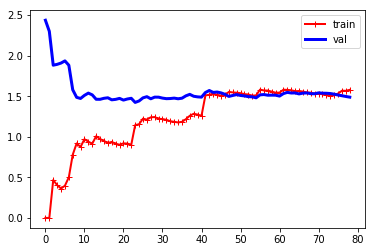

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

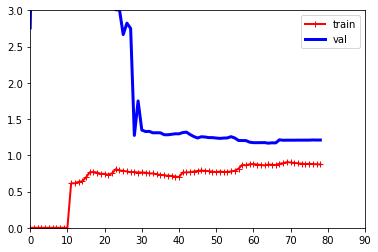

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plt.axis([0, 90, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

##Regularization

###Ridge
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n{\theta_i^2}$

$\hat\theta =  (X^{T}X + \alpha A)^{-1}X^{T}y$



In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky') # Matrix factorization
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.65280664]])

In [ ]:
sgd_reg = SGDRegressor(penalty='l2') # SGD
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.79151257])

###Lasso

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n{|\theta_i|}$

$g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha$ $\begin{pmatrix}sign(\theta_1)\\
sign(\theta_2)\\
\cdots\\
sign(\theta_n)\end{pmatrix}$



In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# SGD penalty='l1'

array([4.60069358])

###Elastic net

$J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n{|\theta_i|} + \frac{1 - r}{2}\sum_{i=1}^n{\theta_i^2}$

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.60554495])

###Early stopping

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
errs = []
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  errs.append(val_error)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [ ]:
best_epoch

153

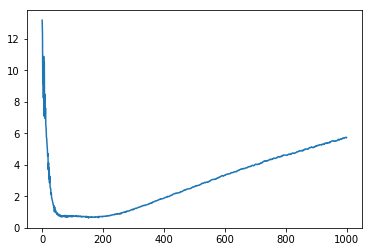

In [ ]:
plt.plot(range(1000), errs)

##Logistic regression

###Binary classification

$\hat{p} = \sigma(\theta^Tx)$

$\sigma(t) = \frac{1}{1 + e^{-t}}$

$J(\theta) = -\frac{1}{m} \sum_{i=1}^m{[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]}$

$\frac{\delta}{\delta\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m{(\sigma(\theta^Tx^{(i)}) - y^{(i)})x_j^{(i)}}$


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # Iris-Virginica

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

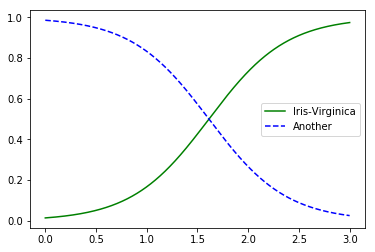

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Another')
plt.legend()
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

###Softmax regression

$s_k(x) = (\theta^{(k)})^Tx$

$\hat{p_k} = \sigma(s(x))_k =  \frac{exp(s_k(x))}{\sum_{j = 1}^{K}{exp(s_j(x))}}$

$\hat{y} = argmax_{k}\sigma(s(x))_k$

$J(\Theta) = -\frac{1}{m}\sum_{i = 1}^{m}\sum_{k = 1}^{K}y_k^{(i)}log(\hat{p}^{(i)}_k)$

$\nabla _{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i = 1}^{m}{(\hat{p}^{(i)}_k - y^{(i)}_k)x^{(i)}}$



In [ ]:
X = iris['data'][:, (2, 3)] # petal width and length
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:

from sklearn.metrics import log_loss

def softmax_score(X, theta):
  return X.dot(theta)

def softmax(X, thetas):
  S = np.sum(np.exp(softmax_score(X, thetas)), axis=1, keepdims=True)
  return np.exp(softmax_score(X, thetas)) / S

def Grad(X, y, thetas):
  return (X.T.dot(softmax(X, thetas) - y)) / y.shape[0]

class BGD:
  def __init__(self, batch_size=8, lr=0.01, epoches=5000):
    self.batch_size = batch_size
    self.lr = lr
    self.epoches = epoches
    
  def fit(self, X, y):
    self.weights = np.random.randn(len(X[0]), 3)
    best_score = float('inf')
    self.best_model = None
    self.b_ep = None
    for e in range(self.epoches):
      idx = np.random.randint(0, y.shape[0] - 1, self.batch_size)
      self.weights -= self.lr * Grad(X[idx], y[idx], self.weights) + np.r_[np.zeros([1, 3]), 0.4 * self.weights[1:]]
      preds = softmax(X, self.weights)
      loss = log_loss(y, preds)
      #print(loss)
      if loss < best_score:
        best_score = loss
        self.best_model = self.weights
        self.b_ep = e
    
  def predict(self, X):
    return np.argmax(softmax(X, self.weights), axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

y_ohe = OneHotEncoder().fit_transform(y.reshape(-1, 1)) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y_ohe, test_size=0.2)

In [ ]:
bgd_clf = BGD()

bgd_clf.fit(X_train, y_train)

In [ ]:
preds = bgd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(y_test, axis=1), preds)

0.7333333333333333

In [ ]:
bgd_clf.b_ep

4993

In [ ]:
bgd_clf.weights

array([[-4.15313902, -4.28820137, -2.66826613],
       [ 4.70312708,  2.27125743,  2.53923563],
       [ 3.58895489,  3.07718913,  2.4446398 ]])

In [ ]:
np.unique(y)

array([0, 1, 2])